In [3]:
# kmedoids_mall_customers.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids

# Step 1: Load data
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

# Step 2: Select features (Annual Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Use elbow method manually (optional) or directly choose k
# For K-Medoids, let’s pick k=5 to match previous K-Means example

# Step 4: Fit KMedoids
kmedoids = KMedoids(n_clusters=5, random_state=42, method='pam')
df['Cluster'] = kmedoids.fit_predict(X)

# Step 5: Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', s=100)

# Mark the medoids
medoids = kmedoids.cluster_centers_
plt.scatter(medoids[:,0], medoids[:,1], c='black', s=200, marker='X', label='Medoids')

plt.title('K-Medoids Clustering of Customers')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

In [2]:
!pip install scikit-learn-extra


  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn-extra


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [74 lines of output]
  C:\Users\Nitro\AppData\Local\Temp\pip-build-env-y03e3ynr\overlay\Lib\site-packages\setuptools\dist.py:599: SetuptoolsDeprecationWarning: Invalid dash-separated key 'description-file' in 'metadata' (setup.cfg), please use the underscore name 'description_file' instead.
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
          (Affected: scikit-learn-extra).
  
          By 2026-Mar-03, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!

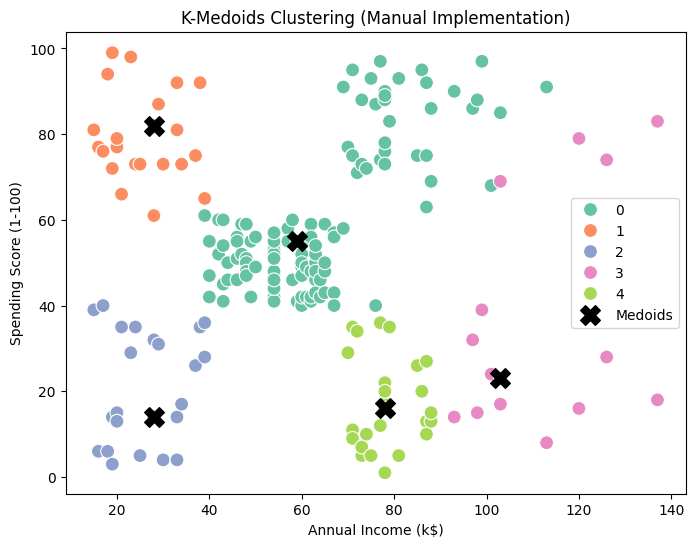

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

# Parameters
k = 5
max_iter = 100

# Step 1: Initialize medoids randomly
np.random.seed(42)
medoid_indices = np.random.choice(len(X), k, replace=False)
medoids = X[medoid_indices]

for iteration in range(max_iter):
    # Step 2: Assign each point to the nearest medoid
    distances = np.linalg.norm(X[:, np.newaxis] - medoids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Step 3: Update medoids
    new_medoid_indices = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            continue
        # Compute cost for each point as medoid
        cost = np.sum(np.linalg.norm(cluster_points[:, np.newaxis] - cluster_points, axis=2), axis=1)
        min_cost_index = np.argmin(cost)
        # Find original index in X
        original_index = np.where((X == cluster_points[min_cost_index]).all(axis=1))[0][0]
        new_medoid_indices.append(original_index)

    # Check for convergence
    if np.array_equal(new_medoid_indices, medoid_indices):
        break
    else:
        medoid_indices = new_medoid_indices
        medoids = X[medoid_indices]

# Assign final labels
distances = np.linalg.norm(X[:, np.newaxis] - medoids, axis=2)
labels = np.argmin(distances, axis=1)

# Add labels to DataFrame
df['Cluster'] = labels

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', s=100)

# Plot medoids
plt.scatter(medoids[:,0], medoids[:,1], c='black', s=200, marker='X', label='Medoids')

plt.title('K-Medoids Clustering (Manual Implementation)')
plt.legend()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Mall_Customers.csv')
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

# Step 1: Load the data
df = pd.read_csv('Mall_Customers.csv')

# Step 2: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Apply MiniBatchKMeans
k = 5  # number of clusters (for example)
mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=20)
df['Cluster'] = mbk.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', s=100)

# Mark the cluster centers
centers = mbk.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X', label='Centers')

plt.title('Mini-Batch K-Means Clustering of Customers')
plt.legend()
plt.show()
